In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

In [2]:
df1=pd.read_csv('../SH&C/heroes_information.csv')
df1.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [3]:
df1.isnull().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [4]:
df1.replace(to_replace='-',value='Other',inplace=True)
df1['Publisher'].fillna('Other',inplace=True)#doing this as publisher has null values in 15 rows

In [5]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
temp_series = df1['Publisher'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Comic-wise Superheroes distribution',
    width=900,
    height=900,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Comic")

In [7]:
df_powerful_hero=pd.read_csv('../SH&C/super_hero_powers.csv')
df_powerful_hero.head(1)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df_powerful_hero=df_powerful_hero*1 # converting True and False to "0" & "1", so that we can calculate maximum power

In [9]:
df_powerful_hero.loc[:, 'no_of_powers'] = df_powerful_hero.iloc[:, 1:].sum(axis=1)

In [10]:
df_powerful_hero.head(10)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,no_of_powers
0,3-D Man,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16
3,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
5,Abraxas,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,14
6,Absorbing Man,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,11
7,Adam Monroe,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,Adam Strange,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,10
9,Agent Bob,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df_all_power_hero=df_powerful_hero[['hero_names','no_of_powers']]


In [12]:
df_all_power_hero=df_all_power_hero.sort_values('no_of_powers',ascending=False)

In [13]:
df_all_power_hero.head(10)

,hero_names,no_of_powers
563,Spectre,49
18,Amazo,44
394,Martian Manhunter,35
370,Living Tribunal,35
388,Man of Miracles,34
139,Captain Marvel,33
597,T-X,33
246,Galactus,32
594,T-1000,32
455,One-Above-All,31


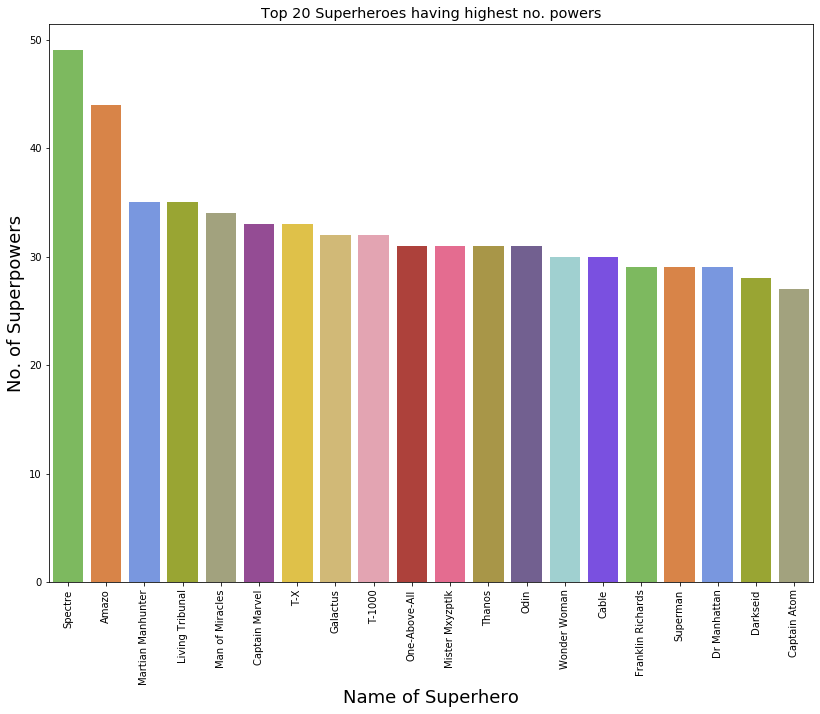

In [14]:
type_colors = ['#78C850',
                    '#F08030', 
                    '#6890F0', 
                    '#A8B820', 
                    '#A8A878', 
                    '#A040A0',
                    '#F8D030', 
                    '#E0C068', 
                    '#EE99AC', 
                    '#C03028', 
                    '#F85888', 
                    '#B8A038',
                    '#705898', 
                    '#98D8D8',  
                    '#7038F8',  
                   ]

fig, ax = plt.subplots()

fig.set_size_inches(13.7, 10.27)

sns.set_context("paper", font_scale=1.5)
f=sns.barplot(x=df_all_power_hero["hero_names"].head(20), y=df_all_power_hero['no_of_powers'].head(20), data=df_all_power_hero,palette=type_colors)
f.set_xlabel("Name of Superhero",fontsize=18)
f.set_ylabel("No. of Superpowers",fontsize=18)
f.set_title('Top 20 Superheroes having highest no. powers')
for item in f.get_xticklabels():
    item.set_rotation(90)

In [15]:
cnt_srs = df1['Gender'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1]
    ),
)

layout = dict(
    title='Gender distribution of Superheroes',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Superheroes")

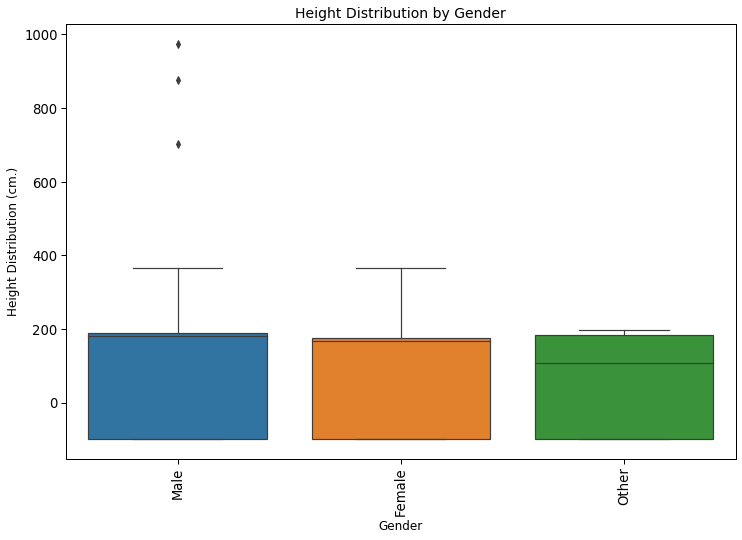

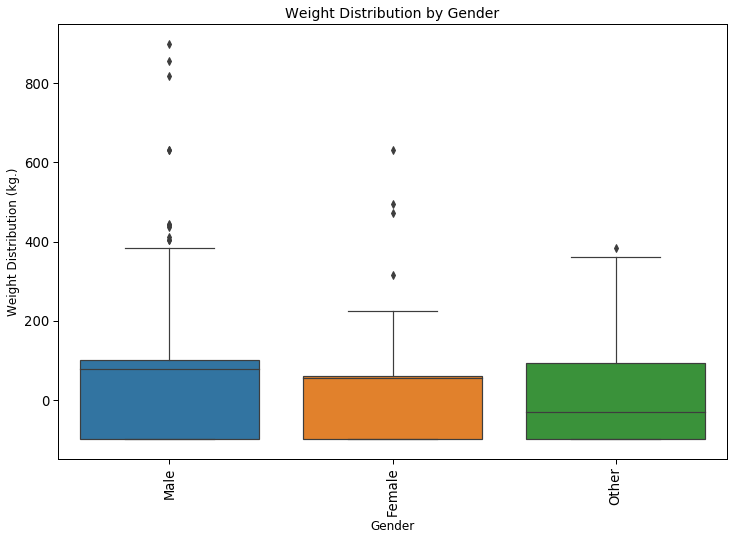

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Gender", y="Height", data=df1)
plt.ylabel('Height Distribution (cm.)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.title("Height Distribution by Gender", fontsize=14)
plt.xticks(rotation='vertical')
plt.show()


plt.figure(figsize=(12,8))
sns.boxplot(x="Gender", y="Weight", data=df1)
plt.ylabel('Weight Distribution (kg.)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.title("Weight Distribution by Gender", fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
df_alignment1=df1.loc[df1['Gender']=='Male']
cnt_srs = df_alignment1['Alignment'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Alignment of Male Superheroes'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Alignment1")


df_alignment2=df1.loc[df1['Gender']=='Female']
cnt_srs = df_alignment2['Alignment'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Alignment of Female Superheroes'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Alignment2")

In [18]:
cnt_srs = df1['Race'].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="blue",
        #colorscale = 'Blues',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Race Type of Superheroes'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Race")

In [19]:
df2=pd.read_csv('../SH&C/super_hero_powers.csv')
df2.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df2.isnull().any()


hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
                         ...  
Phoenix Force            False
Molecular Dissipation    False
Vision - Cryo            False
Omnipresent              False
Omniscient               False
Length: 168, dtype: bool

In [21]:
df_superhero=df2['hero_names']

df2.drop('hero_names',axis=1,inplace=True)

In [22]:
df3=pd.DataFrame()

for i in df2.columns:
    df3[i]=df2[i].value_counts()

In [23]:
df3.drop(df3.index=='False', inplace=True)

In [24]:
df3

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
True,242,178,11,25,47,257,126,77,212,30,...,14,16,2,9,1,1,1,2,2,2


In [25]:
df3=df3.T
df3=df3.reset_index()
df3.head()

,index,True
0,Agility,242
1,Accelerated Healing,178
2,Lantern Power Ring,11
3,Dimensional Awareness,25
4,Cold Resistance,47


In [26]:
df3['No_of_Superheroes']=df3[True]
df3.drop(True,axis=1,inplace=True)

In [27]:
df3.rename(columns={'index': 'Super_Power_Name'}, inplace=True)

In [28]:
df3 = df3.sort_values('No_of_Superheroes', ascending=False)

In [29]:
df3=df3.loc[df3['No_of_Superheroes']>50] #We take only when more than 50 ssuperheroes have the superpower

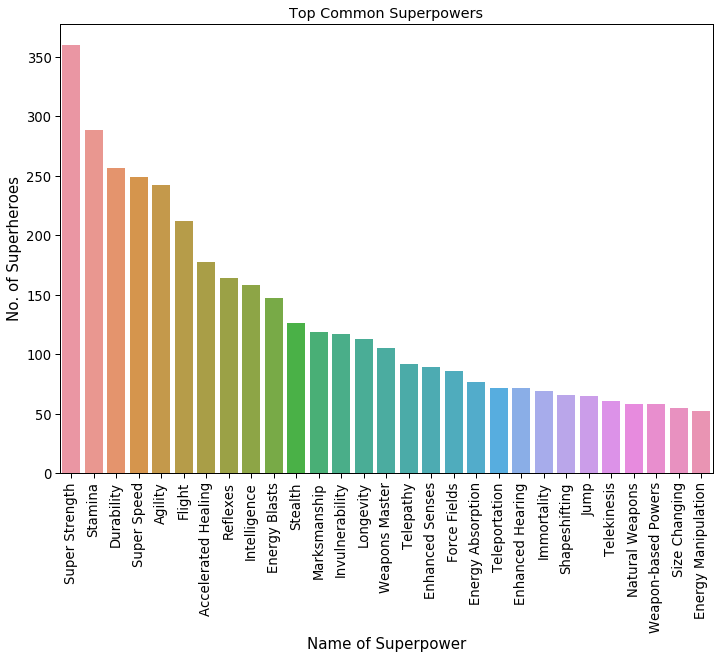

In [30]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)

sns.set_context("paper", font_scale=1.5)
f=sns.barplot(x=df3["Super_Power_Name"], y=df3['No_of_Superheroes'], data=df3)
f.set_xlabel("Name of Superpower",fontsize=15)
f.set_ylabel("No. of Superheroes",fontsize=15)
f.set_title('Top Common Superpowers')
for item in f.get_xticklabels():
    item.set_rotation(90)